In [1]:
import tensorflow as tf
from tensorflow import keras as k
# from utils import utils_c
import os
import numpy as np

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
import os

# layers
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization,Convolution2D

# optimizers
from tensorflow.keras.optimizers import Adam

# preprocessing
from tensorflow.keras.preprocessing import image

In [2]:

from keras.datasets.mnist import load_data

(train_digits, train_labels), (test_digits, test_labels) = load_data()

Using TensorFlow backend.


In [3]:
size = (train_labels.shape[0],1)
train_labels = train_labels.reshape(size)

N = train_digits.shape[0]
train_digits = train_digits.reshape(N,-1)

train_digits = np.hstack((train_digits,train_labels))

In [4]:
VALID_SIZE = 10000
train_digits = np.random.permutation(train_digits)
valid_digits = train_digits[:VALID_SIZE]
train_digits = train_digits[VALID_SIZE:]
valid_digits.shape,train_digits.shape

((10000, 785), (50000, 785))

In [5]:
train = train_digits[:,:784]
train_labels = train_digits[:,784:]

valid = valid_digits[:,:784]
valid_labels = valid_digits[:,784:]

valid.shape,valid_labels.shape 

((10000, 784), (10000, 1))

In [6]:
N = train.shape[0]
train = train.reshape((N,28,28,1))

N = valid.shape[0]
valid = valid.reshape((N,28,28,1))

train.shape,valid.shape 

((50000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
testt = test_digits.reshape(test_digits.shape+(1,))

In [8]:
train.shape,valid.shape,testt.shape

((50000, 28, 28, 1), (10000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
testt = testt.astype('float32') / 255
train = train.astype('float32') / 255
valid = valid.astype('float32') / 255

In [10]:
from keras.utils import to_categorical
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
valid_labels_cat = to_categorical(valid_labels,num_classes)



In [11]:
train_labels_cat.shape, test_labels_cat.shape,valid_labels_cat.shape

((50000, 10), (10000, 10), (10000, 10))

In [12]:
%pylab inline
import matplotlib.pyplot as plt
    
def displayImageArr(arr,title = ""):
    plt.imshow(arr)
    if title != "":
        print("======= title {}".format(title))


Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.virtualenvs/dl4cv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


======= title [4]


/home/ubuntu/.virtualenvs/dl4cv/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


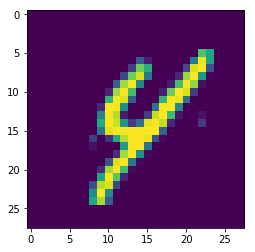

In [13]:
index = 321

displayImageArr(valid[index].reshape(valid[index].shape[:-1]),valid_labels[index])

# Models

In [14]:
def linModel():
    print("building model linModel")
    model = Sequential([
        BatchNormalization(input_shape = (28,28,1)),
        Flatten(),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [26]:
model = linModel()
EP = 15
BS = 32

building model linModel


In [25]:
hist = model.fit(train,train_labels_cat,validation_data=(valid, valid_labels_cat),batch_size=BS,epochs=EP)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 7s 141us/step - loss: 0.4060 - acc: 0.8810 - val_loss: 0.3124 - val_acc: 0.9098
Epoch 2/5
50000/50000 [==============================] - 6s 110us/step - loss: 0.2993 - acc: 0.9151 - val_loss: 0.2940 - val_acc: 0.9130
Epoch 3/5
50000/50000 [==============================] - 6s 110us/step - loss: 0.2854 - acc: 0.9180 - val_loss: 0.2853 - val_acc: 0.9207
Epoch 4/5
50000/50000 [==============================] - 5s 110us/step - loss: 0.2766 - acc: 0.9230 - val_loss: 0.3057 - val_acc: 0.9110
Epoch 5/5
50000/50000 [==============================] - 5s 110us/step - loss: 0.2714 - acc: 0.9240 - val_loss: 0.2950 - val_acc: 0.9142


In [15]:
def dblModel():
    print("building model dblModel")
    model = Sequential([
        BatchNormalization(input_shape = (28,28,1)),
        Flatten(),
        Dense(32,activation='relu'),
        BatchNormalization(),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [26]:
def convModel():
    print("building model convModel")
    model = Sequential([
        BatchNormalization(input_shape = (28,28,1)),
        Convolution2D(64,3,3,activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3,3)),
#         Convolution2D(16,3,3,activation='relu'),
#         BatchNormalization(),
#         MaxPooling2D((3,3)),
        Flatten(),
        Dense(10,activation='softmax')
    ])
    model.compile(Adam(),loss='categorical_crossentropy',metrics=["accuracy"])
    return model

In [17]:
def pyPlot(histsList,pType=['acc']):
    for pt in pType:
        plt.figure(figsize=(10,10))

        for i,h in enumerate(histsList):
            plt.subplot(2,2,i+1)    
            plt.ylim(0,1)

            plt.title('model {} {}'.format(pt,i+1))
            plt.ylabel('{}'.format(pt))
            plt.xlabel('epoch')

            plt.plot(h.history['{}'.format(pt)])
            plt.plot(h.history['val_{}'.format(pt)])

            plt.legend(['train', 'test'],loc=0)

        plt.show()

In [18]:
modelType = [linModel() , dblModel() , convModel() ]
models = []
hists = []

EP=15
BS = 32

for model in modelType:
    model.summary()
    print(model)
    hist = model.fit(train,train_labels_cat,validation_data=(valid, valid_labels_cat),batch_size=BS,epochs=EP)
    
    models.append(model)
    hists.append(hist)

building model linModel
building model dblModel
building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,854
Trainable params: 7,852
Non-trainable params: 2
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 264us/step - loss: 0.4045 - acc: 0.8789 - val_loss: 0.3233 - val_acc: 0.9106
Epoch 2/15
50000/50000 [==============================] - 5s 110us/step - loss: 0.2971 - acc: 0.9144 - val_loss: 0.3140 - val_acc: 0.9132
Epoc

50000/50000 [==============================] - 9s 176us/step - loss: 0.2835 - acc: 0.9093 - val_loss: 0.2888 - val_acc: 0.9075
Epoch 5/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.2723 - acc: 0.9123 - val_loss: 0.2471 - val_acc: 0.9218
Epoch 6/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.2672 - acc: 0.9140 - val_loss: 0.3324 - val_acc: 0.8978
Epoch 7/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.2612 - acc: 0.9157 - val_loss: 0.2793 - val_acc: 0.9122
Epoch 8/15
50000/50000 [==============================] - 9s 177us/step - loss: 0.2529 - acc: 0.9180 - val_loss: 0.3154 - val_acc: 0.8982
Epoch 9/15
50000/50000 [==============================] - 9s 175us/step - loss: 0.2507 - acc: 0.9196 - val_loss: 0.2562 - val_acc: 0.9189
Epoch 10/15
50000/50000 [==============================] - 9s 176us/step - loss: 0.2477 - acc: 0.9210 - val_loss: 0.2407 - val_acc: 0.9223
Epoch 11/15
50000/50000 [===================

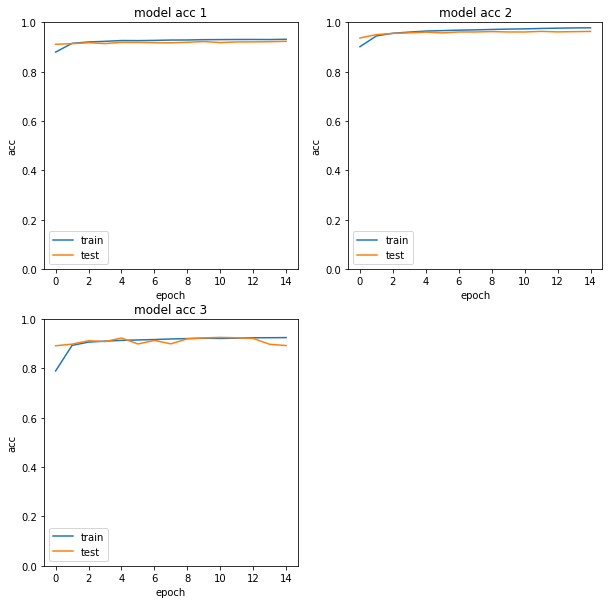

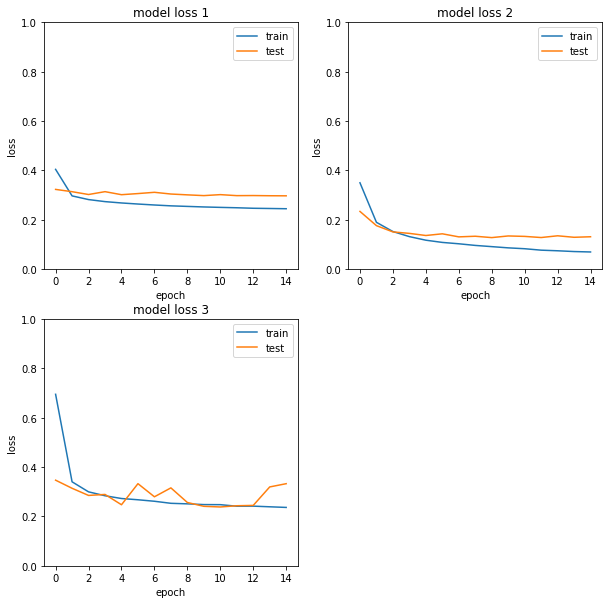

In [19]:
pyPlot(hists,['acc','loss'])

In [20]:
for model in models:
    test_loss, test_acc = model.evaluate(testt, test_labels_cat, batch_size=BS)
    print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_acc))

10000/10000 [==============================] - 0s 41us/step
Test loss: 0.2754 accuracy: 0.9248
10000/10000 [==============================] - 0s 45us/step
Test loss: 0.1102 accuracy: 0.9665
10000/10000 [==============================] - 0s 47us/step
Test loss: 0.2996 accuracy: 0.9057


building model convModel
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_21 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          640       
_________________________________________________________________
batch_normalization_22 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5770      
Total params: 6,670
Trainable params: 6,540
Non-trainable params: 130
_______________________________________________

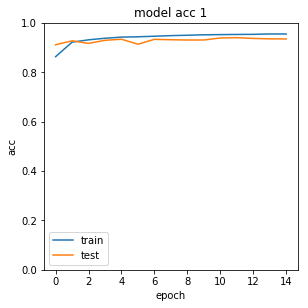

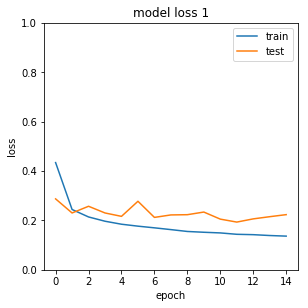

In [30]:
model = convModel()
model.summary()
EP = 15
hist = model.fit(train,train_labels_cat,validation_data=(valid, valid_labels_cat),batch_size=BS,epochs=EP)
pyPlot([hist],['acc','loss'])

In [32]:
test_loss, test_acc = model.evaluate(testt, test_labels_cat, batch_size=BS)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_acc))

10000/10000 [==============================] - 0s 49us/step
Test loss: 0.1876 accuracy: 0.9409
